# K-armed Testbed

This is the basic environment for the k-armed bandit problem as discussed in Sutton & Barto.

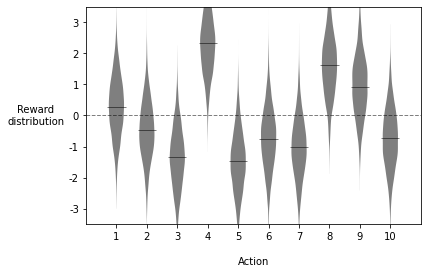

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import interface
import agents
import environments

k=10
env = environments.KArmedBandit(k=k, seed=124)
fig, ax = plt.subplots()
env.plot_reward_dists(ax)

In [2]:
print(f"Most optimal action: {env.opt_action+1}")

Most optimal action: 4


In [3]:
k=10
env = environments.KArmedBandit(k=k, seed=124)
agent = agents.EpsilonGreedyAgent(k=k, epsilon=0.50)

agent.reset()
at, ro, gf = interface.run(agent=agent, environment=env, num_steps=1_000)

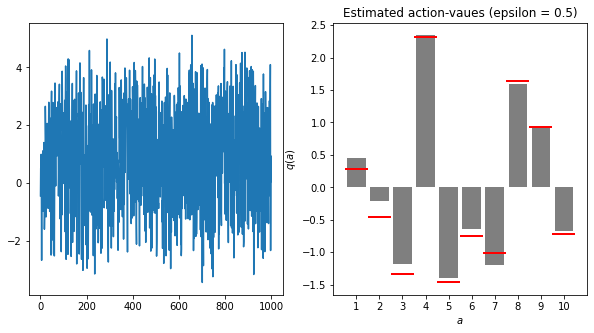

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].plot(ro)
interface.plot_results(agent, env, ax[1])

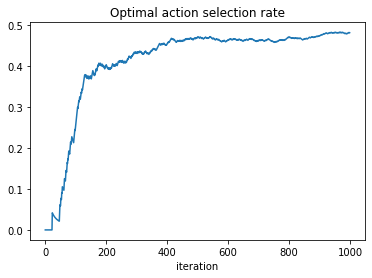

In [10]:
fig, ax = plt.subplots()
ax.plot(interface.cumavg(at == env.opt_action))
ax.set(title='Optimal action selection rate', xlabel='iteration')
plt.show()

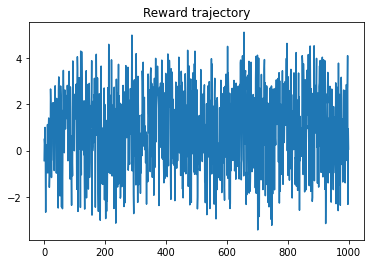

In [12]:
fig, ax = plt.subplots()
ax.plot(ro)
ax.set(title='Reward trajectory')
plt.show()

This makes sense to look so noisy because we never modify $\epsilon$; the agent eventually correctly identifies the optimal action, but it doesn't choose it any more frequently, since it keeps trying to explore. (If we modify the algorithm to shrink $\epsilon$ over time, this should taper off to the optimal mean reward.)

In [17]:
(at == env.opt_action).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,

In [44]:
k=10
num_tests = 2_000
num_steps = 1_000

rewards_accum = np.zeros(num_steps)
opt_action_accum = np.zeros(num_steps)

for _ in range(num_tests):
    env = environments.KArmedBandit(k=k)
    agent = agents.EpsilonGreedyAgent(k=k, epsilon=0.1)
    at, ro, gf = interface.run(agent=agent, environment=env, num_steps=num_steps)
    
    # record rewards
    # reward_avg_traj = np.cumsum(ro) / np.arange(1,len(ro)+1, 1)
    # rewards_accum += reward_avg_traj
    rewards_accum += ro

    # record actions taken
    opt_action_accum += (at == env.opt_action).astype(int)

rewards_accum = rewards_accum / num_tests
opt_action_accum = opt_action_accum / num_tests

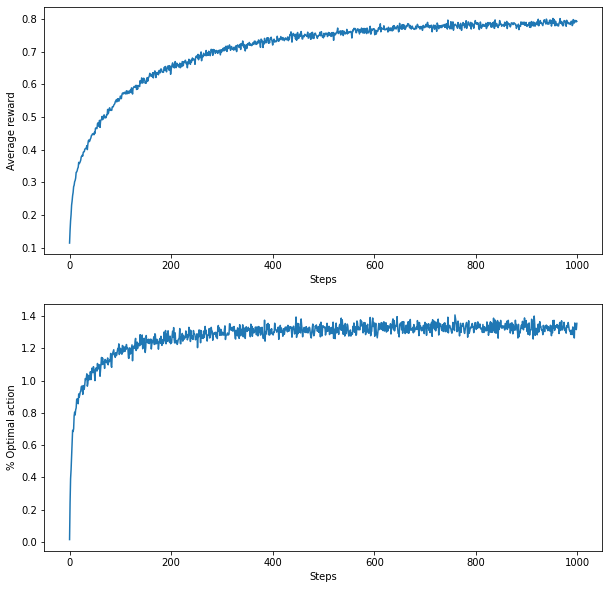

In [45]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 10))
ax[0].plot(opt_action_accum)
ax[0].set(ylabel="Average reward", xlabel="Steps")
ax[1].plot(rewards_accum)
ax[1].set(ylabel="% Optimal action", xlabel="Steps")
plt.show()